In [1]:
import sys
sys.path.append('../')
import networkx as nx
import time
from smodels.theory.exceptions import SModelSTheoryError as SModelSError
from smodels.tools.smodelsLogging import logger
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.theory.topology import TopologyDict
from smodels.theory.crossSection import XSection,XSectionInfo,XSectionList
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.tree import Tree,ParticleNode
from smodels.theory.decomposer import decompose
from smodels.tools.smodelsLogging import logger
from smodels.tools.coverage import FinalStateElement
# logger.setLevel('DEBUG')
import itertools
%load_ext line_profiler

### Load model

In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
# slhafile = '../inputFiles/slha/simplyGluino.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


In [3]:
sigmacut = 10*fb
t0 = time.time()
topDict = decompose(model, sigmacut= sigmacut, massCompress=False, invisibleCompress=False)
# print("decomposer done in %.2f s." % (time.time() -t0 ) )
nUnique = 103 # uncompressed
print('%i unique elements' %(len(topDict.getElements())))
print('%i unique elements (expected)' %nUnique)

103 unique elements
103 unique elements (expected)


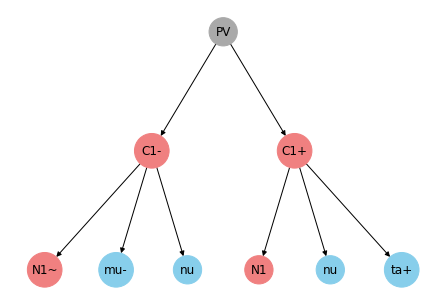

[(PV, 0), (C1-, 1), (C1+, 2), (N1~, 3), (mu-, 4), (nu, 5), (N1, 6), (nu, 7), (ta+, 8)]


In [4]:
el = topDict.getElements()[10]
el.drawTree()
print([(n,n.node) for n in el.tree.nodes])

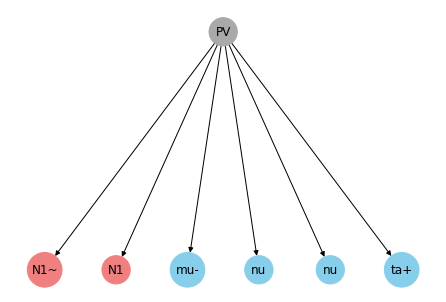

[(PV, 0), (N1~, 3), (N1, 6), (mu-, 4), (nu, 5), (nu, 7), (ta+, 8)]


In [5]:
elComp = el.compressToFinalStates()
elComp.drawTree()
print([(n,n.node) for n in elComp.tree.nodes])

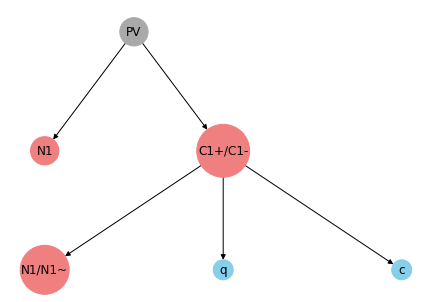

[(PV, 0), (N1, 1), (C1+/C1-, 2), (N1/N1~, 3), (q, 4), (c, 5)]


In [6]:
el = topDict.getElements()[-1]
el.drawTree()
print([(n,n.node) for n in el.tree.nodes])

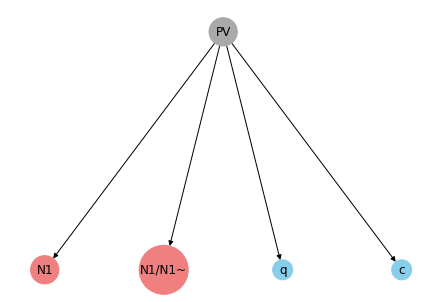

[(PV, 0), (N1, 1), (N1/N1~, 3), (q, 4), (c, 5)]


In [7]:
elComp = el.compressToFinalStates()
elComp.drawTree()
print([(n,n.node) for n in elComp.tree.nodes])

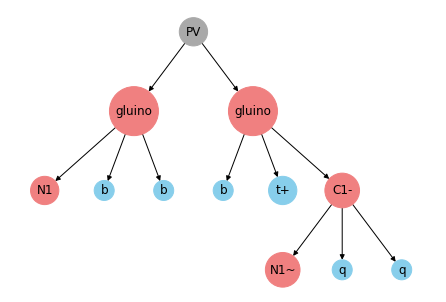

[(PV, 0), (gluino, 1), (gluino, 2), (N1, 3), (b, 4), (b, 5), (b, 6), (t+, 7), (C1-, 8), (N1~, 9), (q, 10), (q, 11)]


In [8]:
el = topDict.getElements()[90]
el.drawTree()
print([(n,n.node) for n in el.tree.nodes])

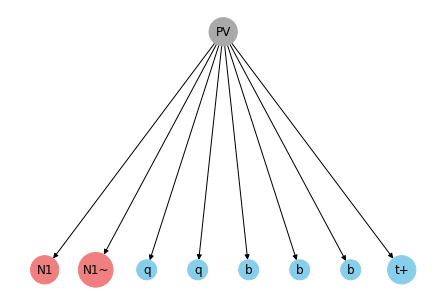

[(PV, 0), (N1, 3), (N1~, 9), (q, 10), (q, 11), (b, 4), (b, 5), (b, 6), (t+, 7)]


In [9]:
elComp = el.compressToFinalStates()
elComp.drawTree()
print([(n,n.node) for n in elComp.tree.nodes])

In [10]:
elComp = FinalStateElement(el)

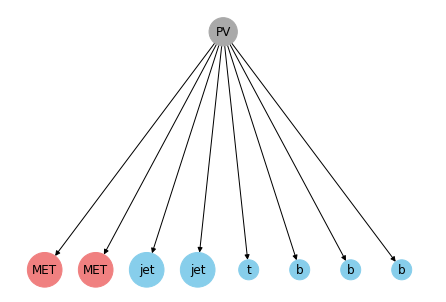

[(PV, 0), (MET, 9), (MET, 3), (jet, 11), (jet, 10), (t, 7), (b, 6), (b, 5), (b, 4)]


In [11]:
elComp.drawTree()
print([(n,n.node) for n in elComp.tree.nodes])

In [12]:
print(elComp)

(PV > MET,MET,jet,jet,t,b,b,b)


In [13]:
print(elComp.missingX)

6.01E-02 [pb]
